___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.duplicated().sum().any()

False

In [7]:
df.isnull().sum().any()

False

In [8]:
df['CustomerID'].nunique()

200

In [9]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [10]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

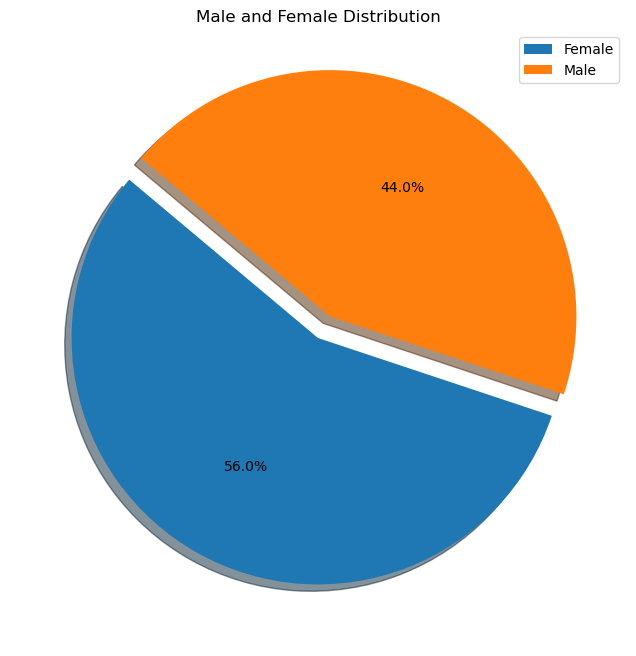

In [11]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
#compare gender ratios, which is one of the important issues in customer segmentation.

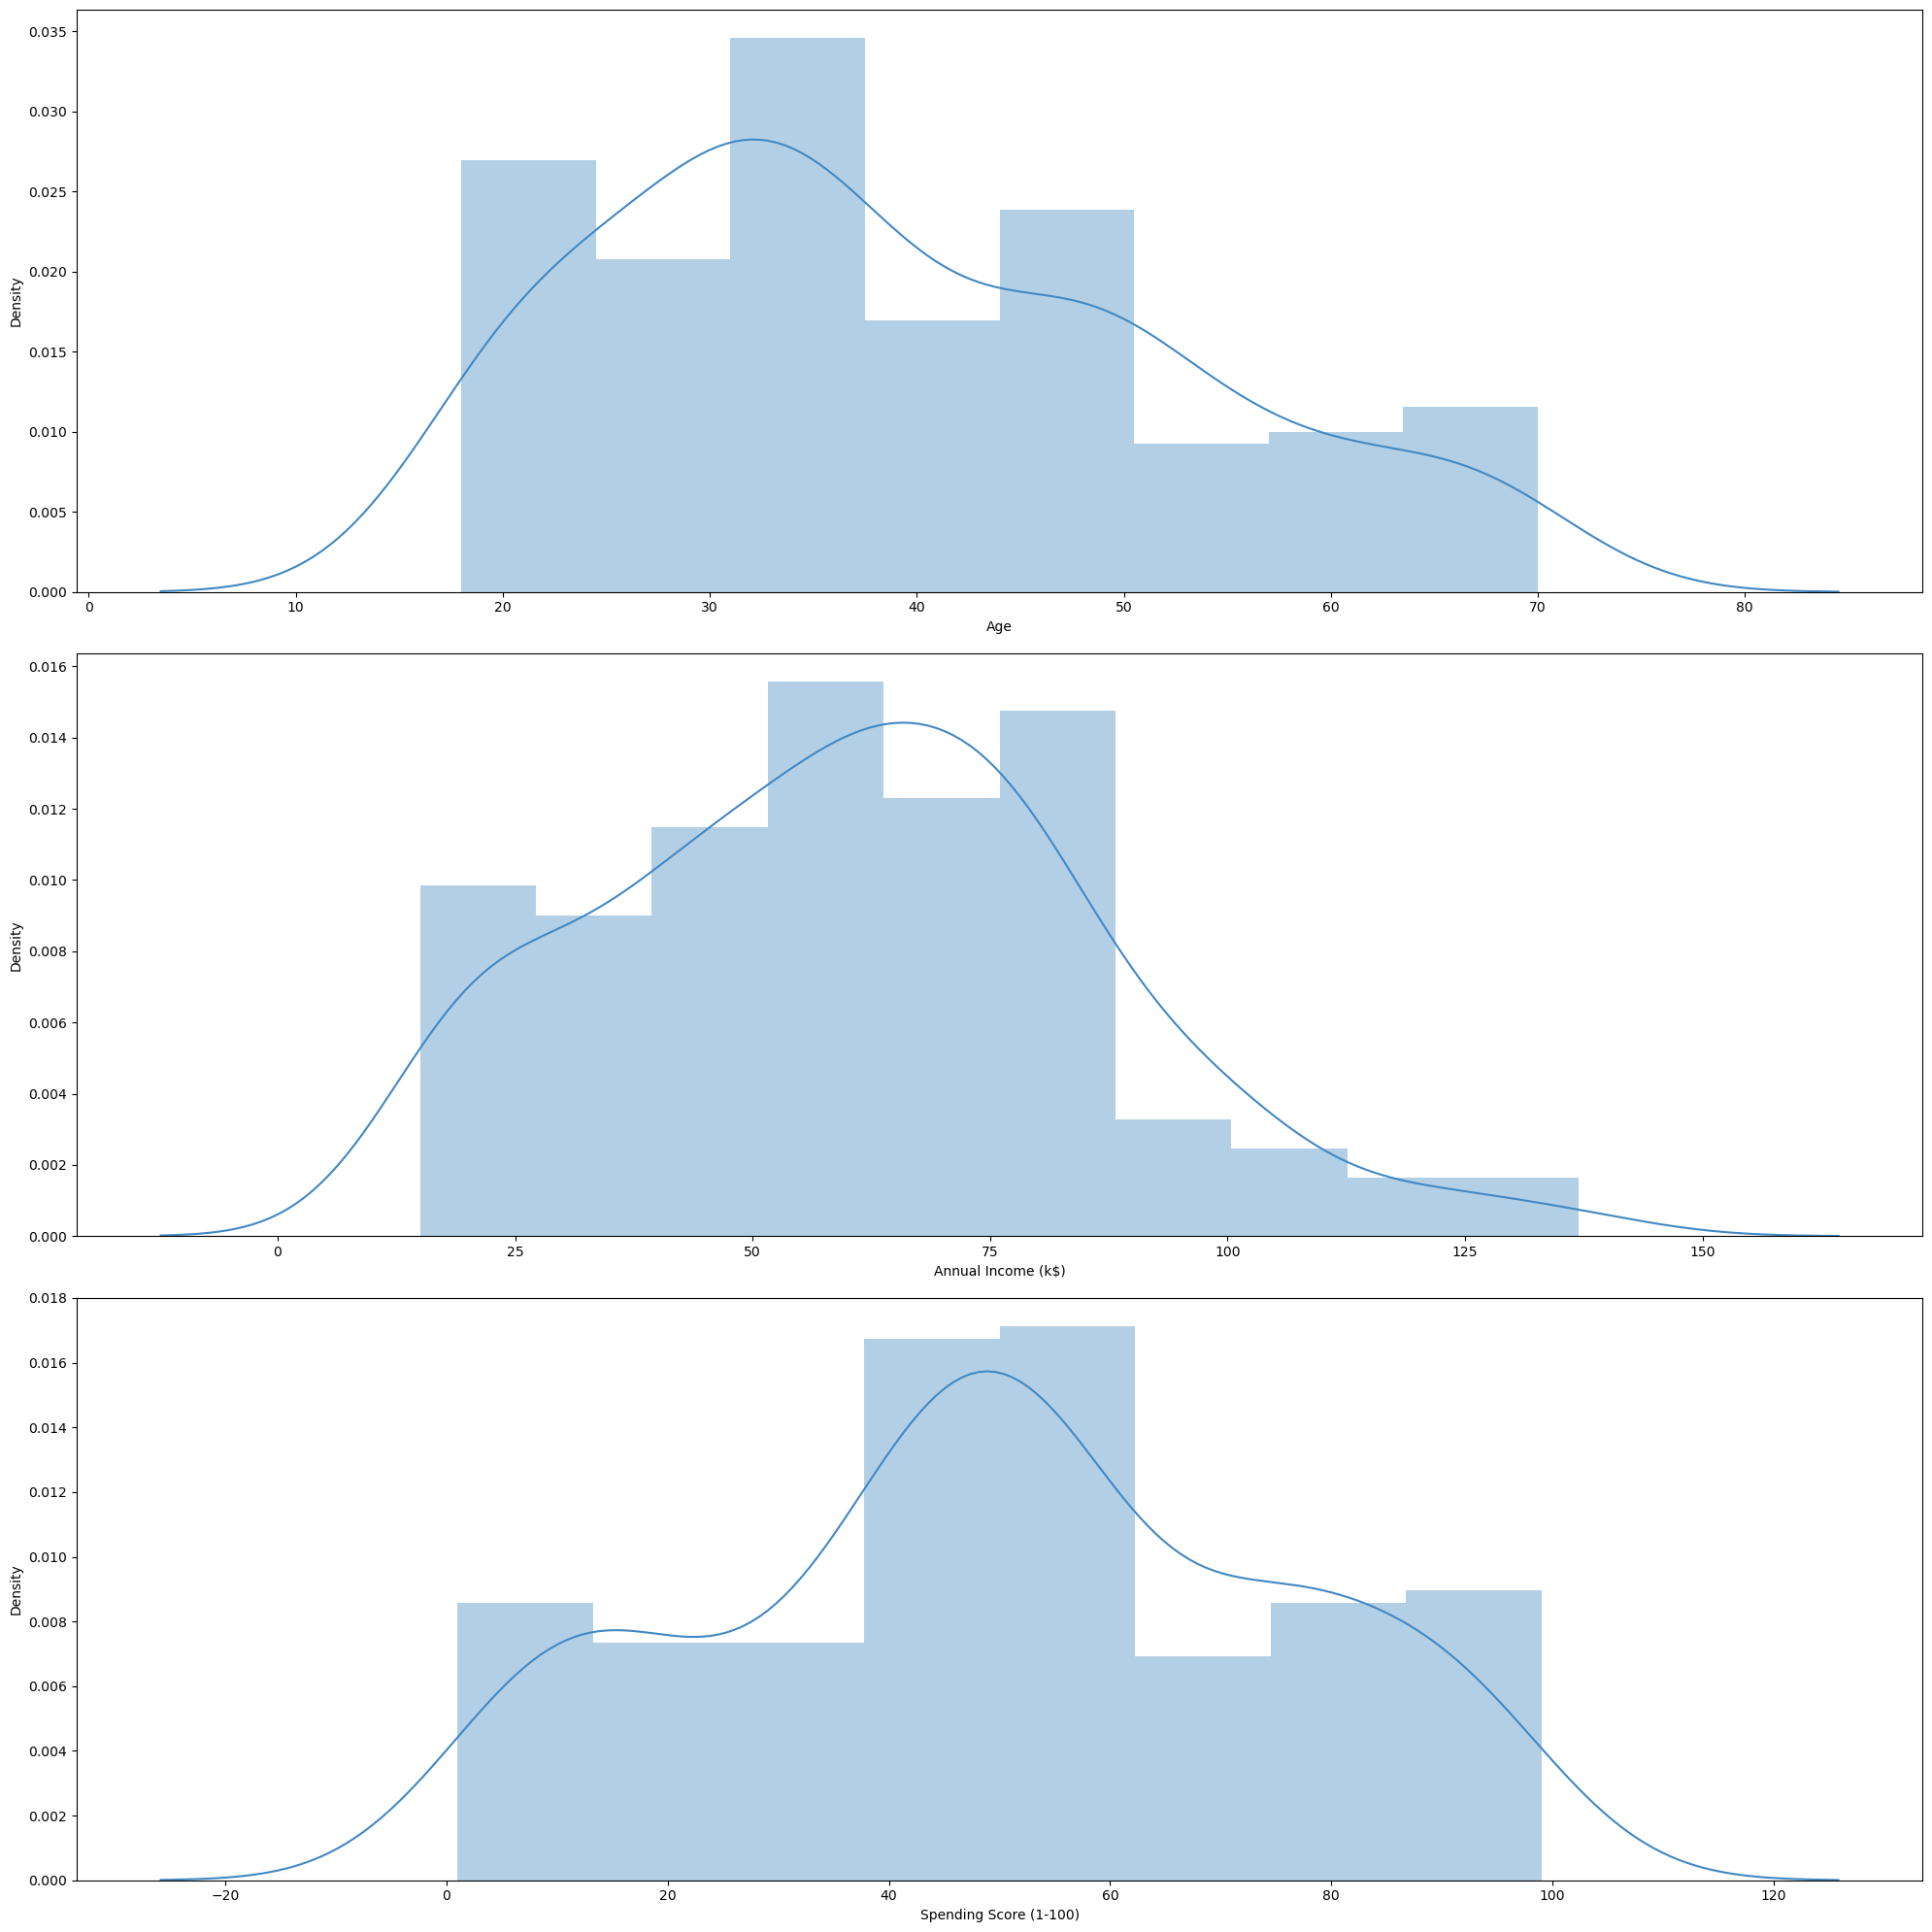

In [12]:
plt.figure(figsize = (20, 20))
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

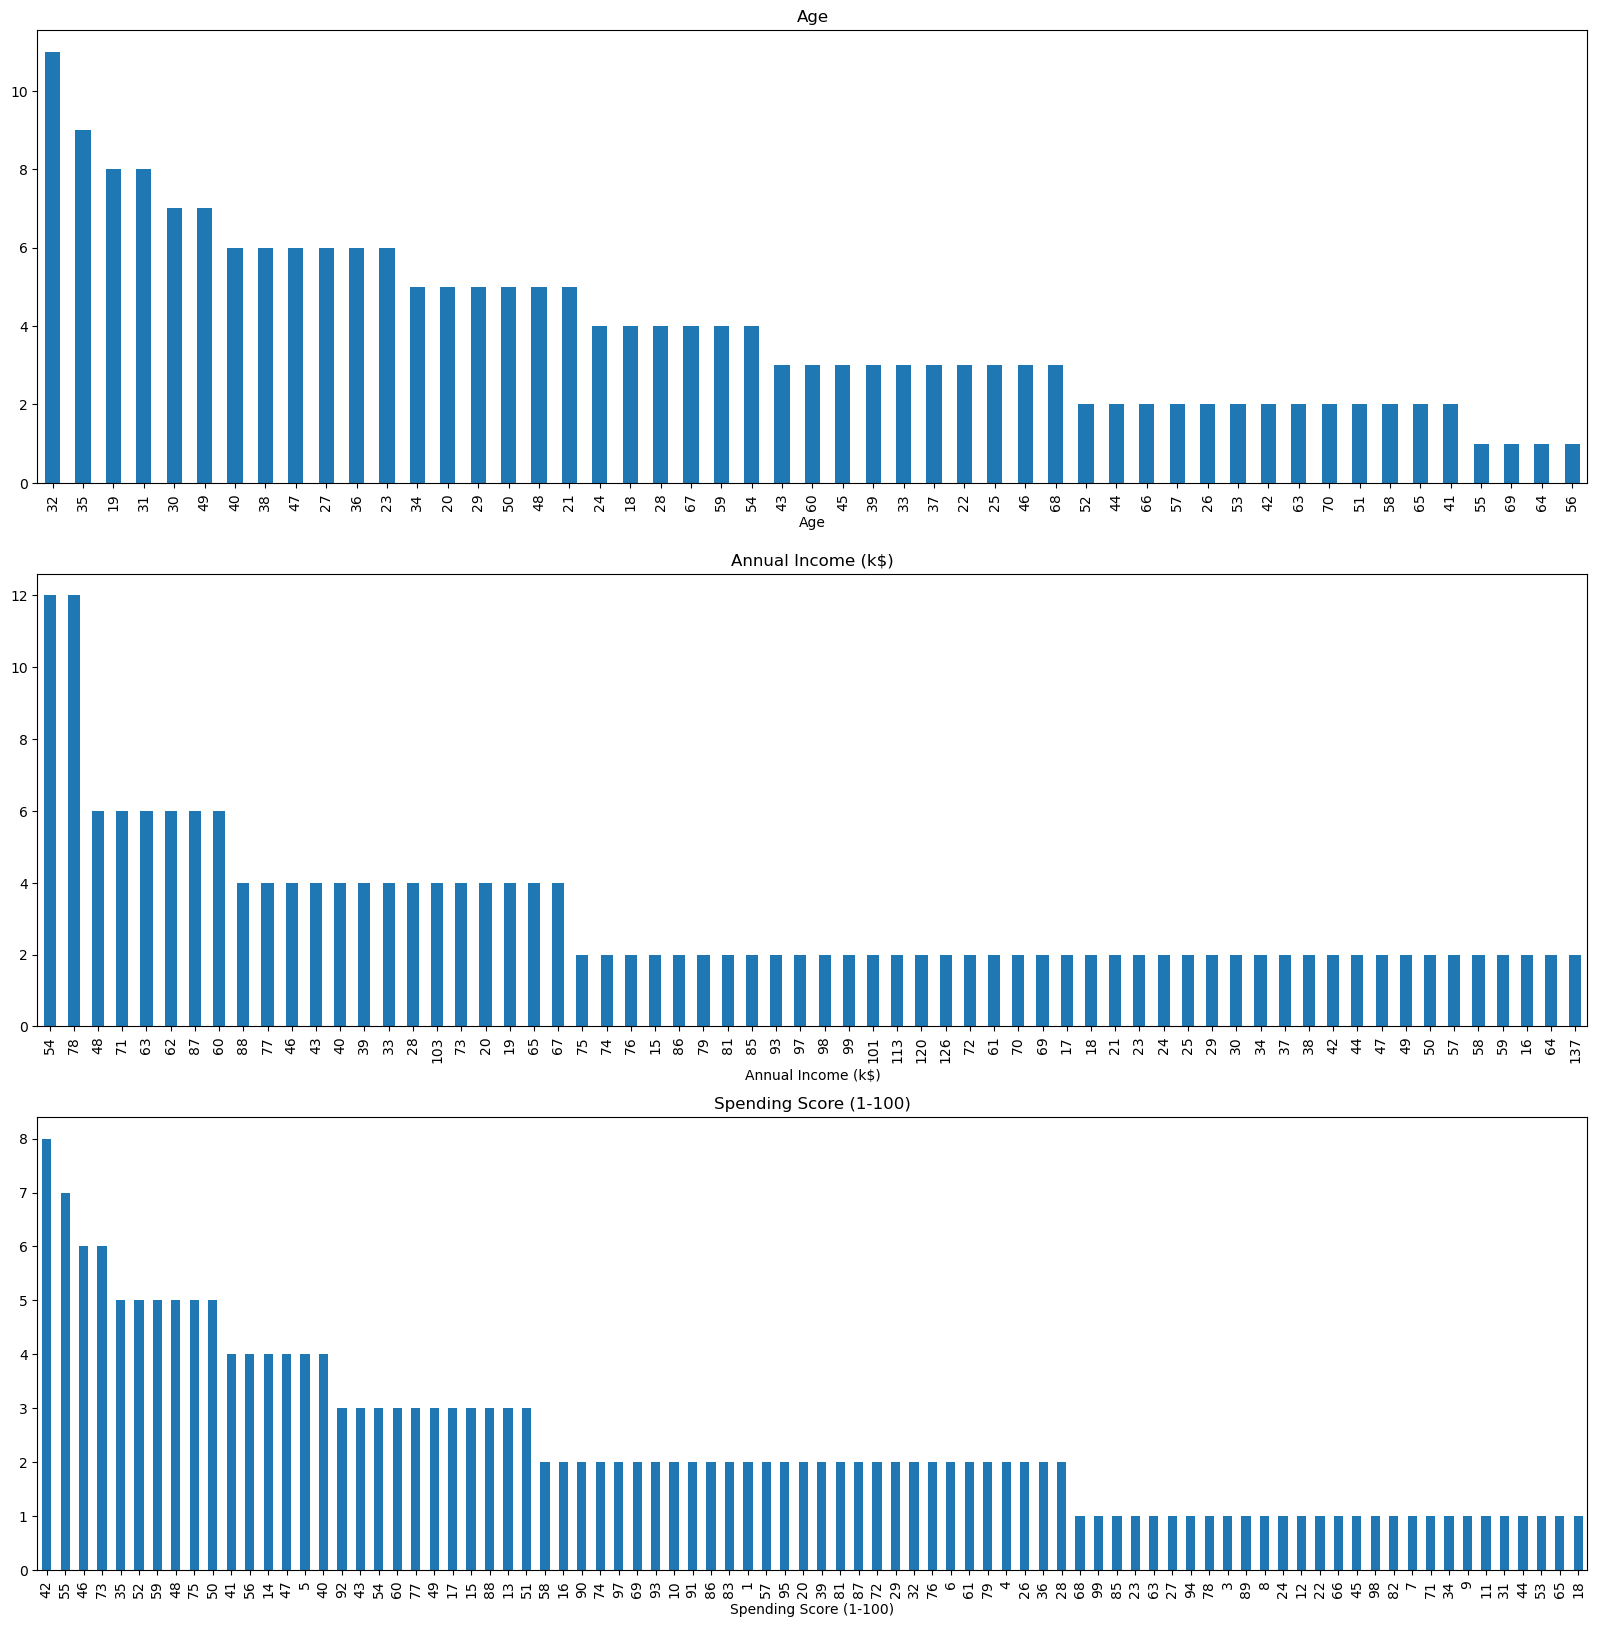

In [13]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      df[column[i]].value_counts().plot.bar(figsize = (20, 20))

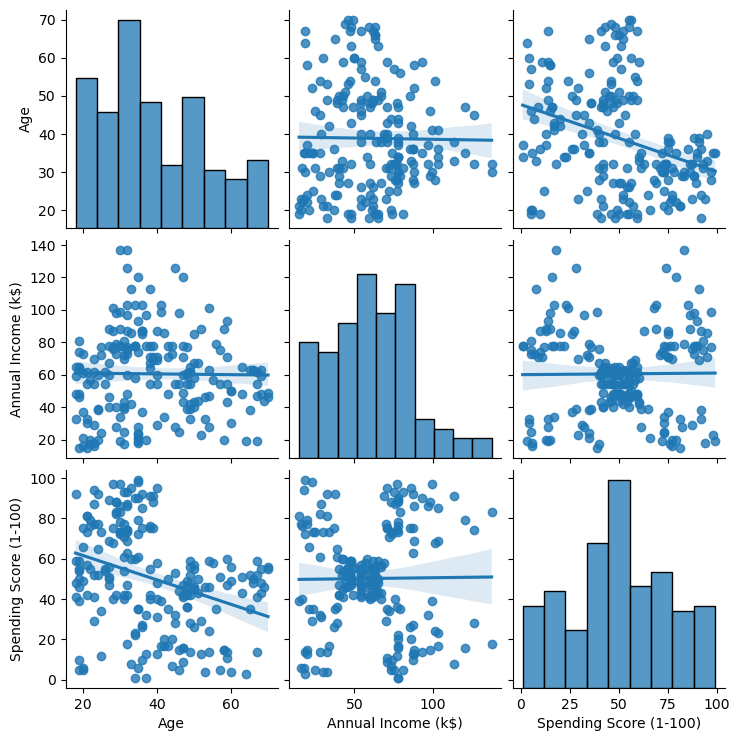

In [14]:
sns.pairplot(df, kind="reg")

<Axes: >

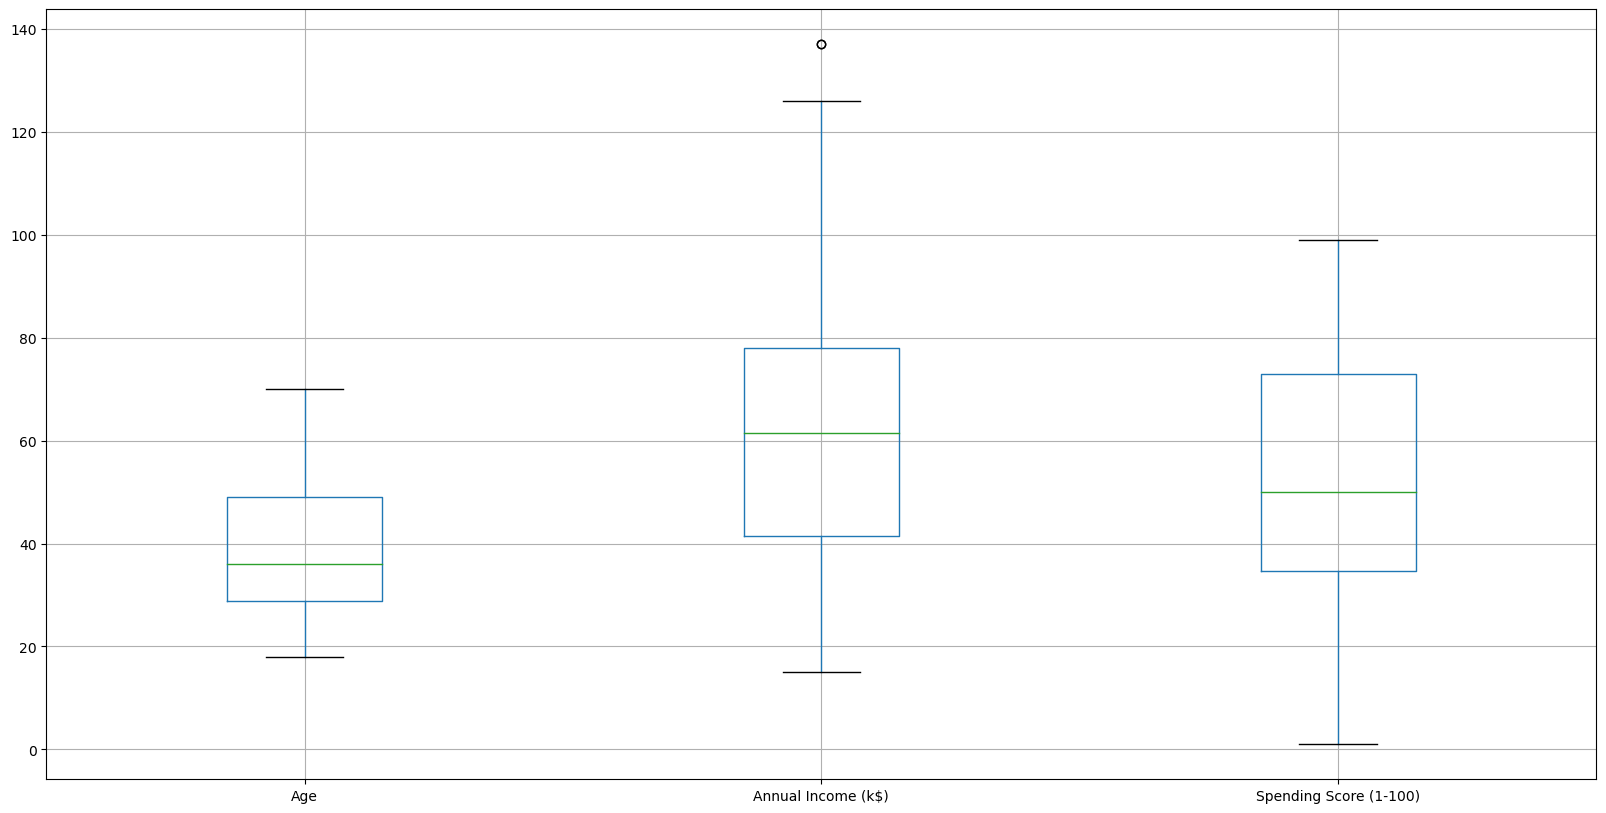

In [15]:
plt.figure(figsize =(20,10))
df.boxplot()

<Axes: >

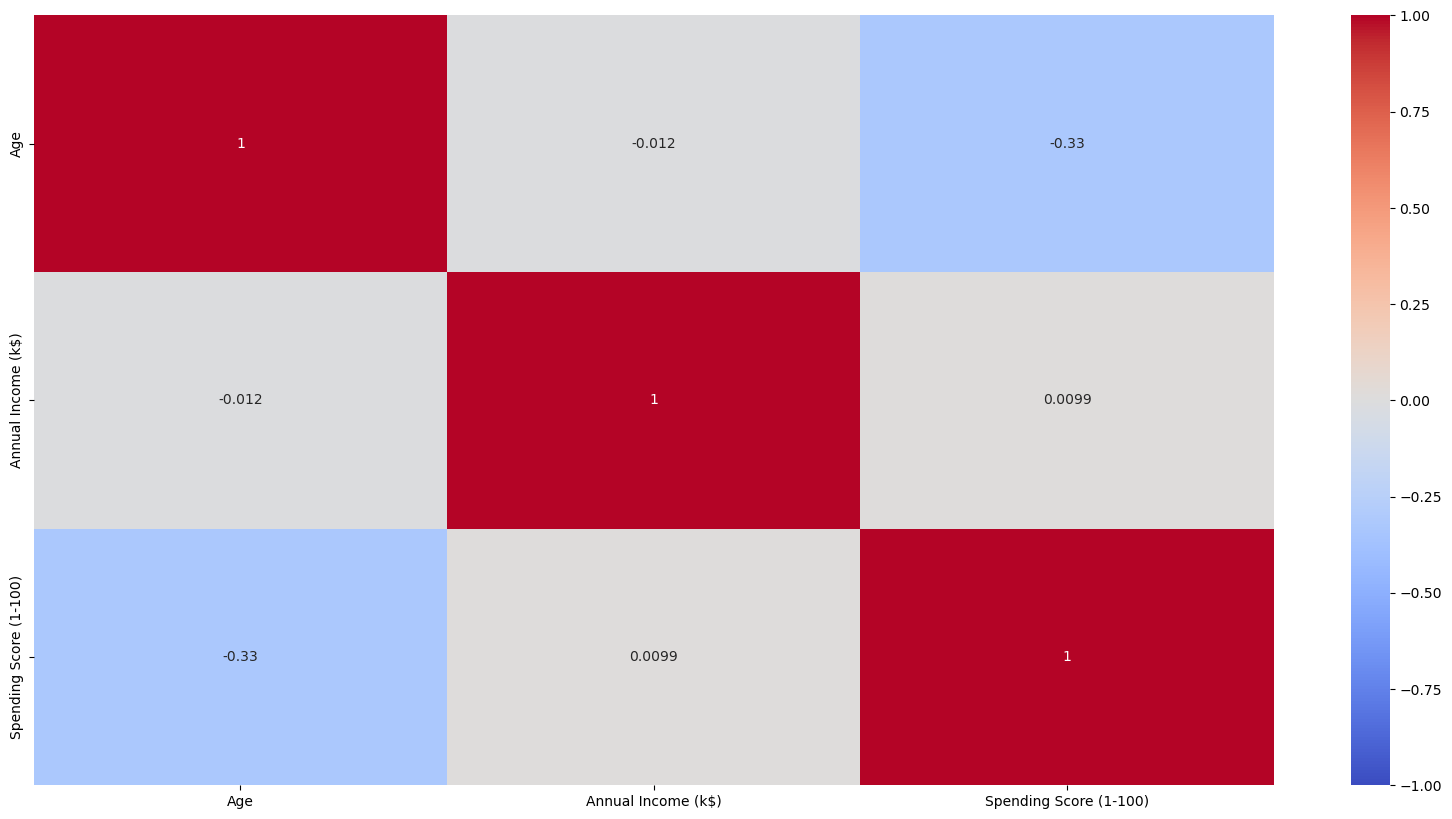

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

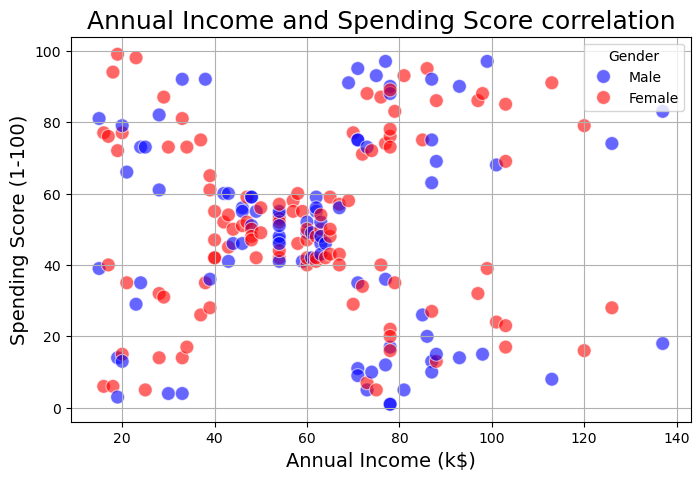

In [17]:
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette=['blue', 'red'], alpha=0.6, s=100)
plt.show()

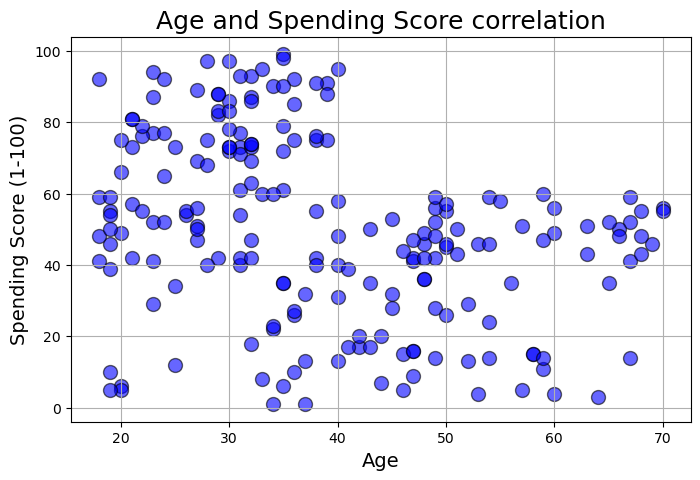

In [18]:
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

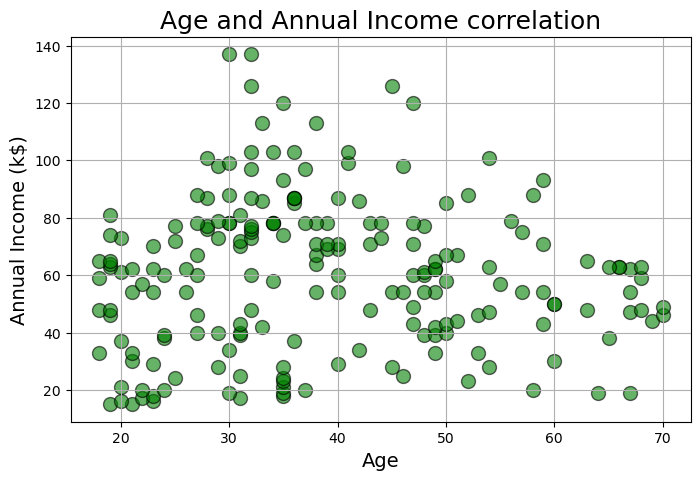

In [19]:
plt.figure(figsize=(8,5))
plt.title("Age and Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

## Conclusion of EDA … 
- It seems there are no high correlations between the variables which is good for us
- Scaling seems unnecessary as all our features are in the same/similar range 
- Balanced data 
- Based on the data: customers can be segmented into almost 5 clusters

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### K_Means Clustering

In [20]:
# scince we do not use categorical features in k-means algorithms, we will drop Gender column
df2 = df.drop(columns="Gender")
df2

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [21]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [22]:
hopkins(df2, 1)

0.6968697005251201

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [23]:
X_age_s=df.iloc[:, [1,3]]
X_age_s.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [24]:
# initial kmean model with initial value of k as 5
K_means_model = KMeans(n_clusters=5,
                       random_state=42)
K_means_model.fit_predict(X_age_s)

array([2, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 2, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 1, 2,
       1, 2, 4, 2, 2, 2, 4, 2, 2, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       1, 4, 2, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 1, 4, 2, 4, 1, 2, 1, 4, 2,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 1, 2, 2, 2, 4, 4, 1, 4, 2, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 2, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       3, 0])

In [25]:
hopkins(X_age_s, 1)

0.7331197222628553

#### *ii. Determine optimal number of clusters*

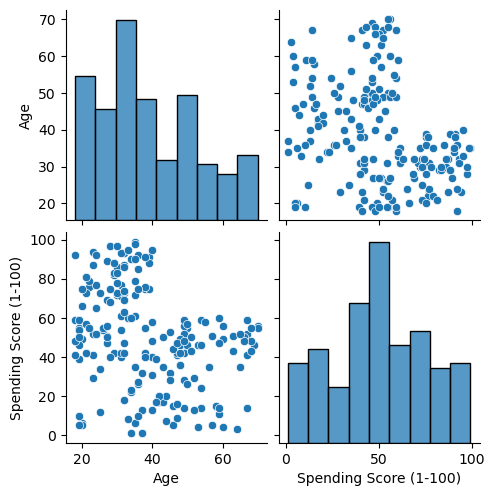

In [26]:
# age and spending score distributions
sns.pairplot(X_age_s);

## inertia elbow method

In [27]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X_age_s)

    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

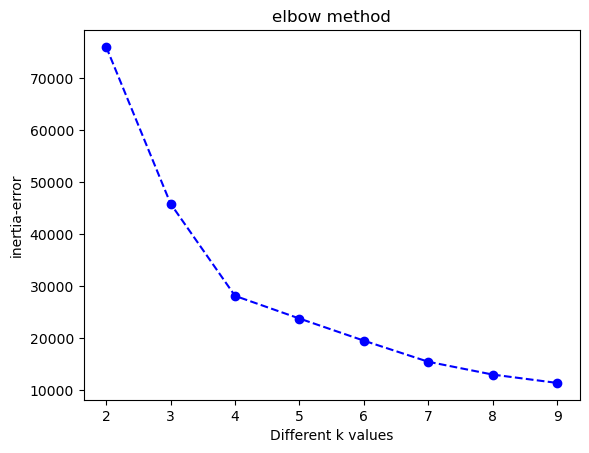

In [28]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [29]:
#print our series
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
dtype: float64

## distortion elbow method

In [30]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_age_s)
    distances = kmeanModel.transform(X_age_s) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

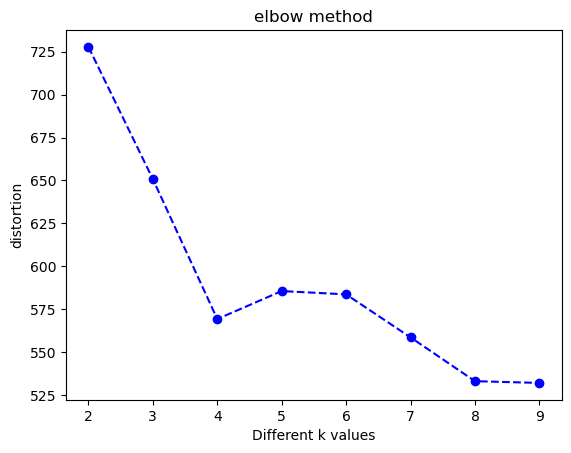

In [31]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [32]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_age_s)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_s, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843


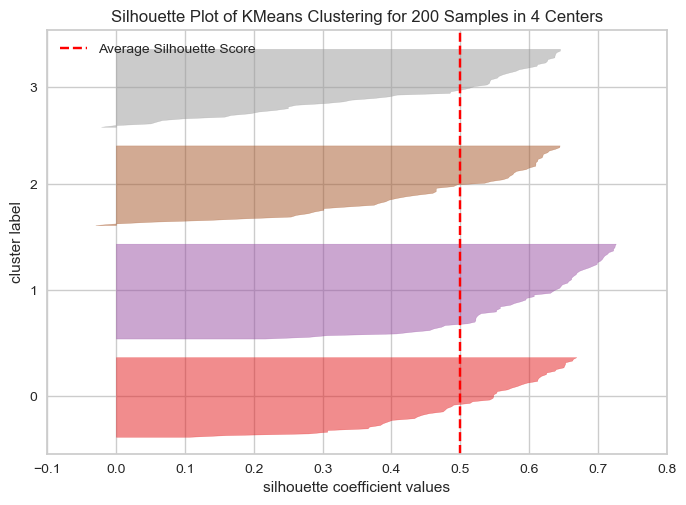

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

model_4 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_4)

visualizer.fit(X_age_s)    # Fit the data to the visualizer
visualizer.poof();


In [34]:
#lets get the clusrers number using n_clusters
model_4.n_clusters

4

In [35]:
#model_4.n_clusters

for i in range(model_4.n_clusters):
    label = (model_4.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.45429047261675404
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [36]:
K_means_model = KMeans(n_clusters=4,
                       random_state=42)
K_means_model.fit_predict(X_age_s)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [37]:
# We are making a copy as we will perform a clustering operation 
#and compare it with Hierarchical Clustering.
df_age_s = X_age_s.copy()
df_age_s

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *iv. Visualizing and Labeling All the Clusters*

In [38]:
clusters = K_means_model.labels_

In [39]:
df_age_s.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [40]:
df_age_s["predicted_clusters"] = clusters
df_age_s.head()

,Age,Spending Score (1-100),predicted_clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


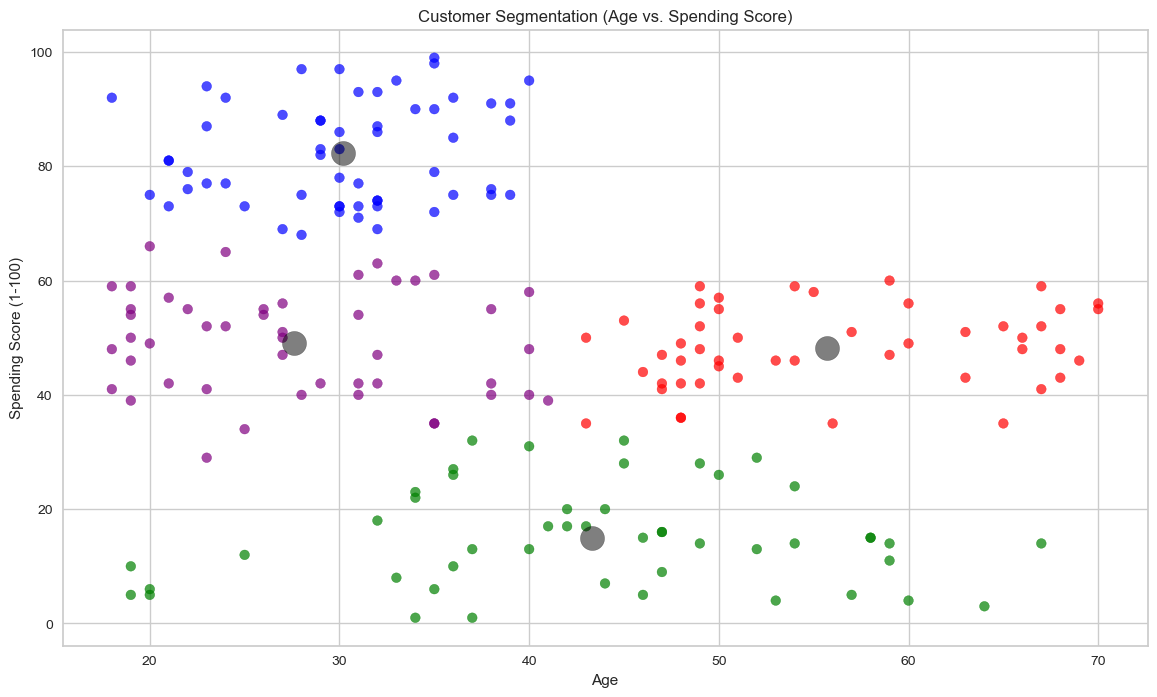

In [41]:
import matplotlib.pyplot as plt

# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}
centers = K_means_model.cluster_centers_
# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.figure(figsize=(14,8))
plt.scatter(df_age_s['Age'],
            df_age_s['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in df_age_s.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

In [42]:
labels={0:'old high spenders', 1:'diverse low spenders',
        2:'young high spenders', 3:'young med spenders'}

df_age_s['Meaningful Labels']=df_age_s['predicted_clusters'].map(labels)
df_age_s.head()

,Age,Spending Score (1-100),predicted_clusters,Meaningful Labels
0,19,39,3,young med spenders
1,21,81,1,diverse low spenders
2,20,6,2,young high spenders
3,23,77,1,diverse low spenders
4,31,40,3,young med spenders


### Clustering based on Annual Income and Spending Score

In [43]:
X_ai_s=df.iloc[:, [2,3]]
X_ai_s.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [44]:
## initial kmean model with initial value of k as 5
K_means_model_2 = KMeans(n_clusters=5,
                       random_state=42)
K_means_model_2.fit_predict(X_ai_s)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [45]:
hopkins(X_ai_s, 1)

0.7095828600377236

#### *ii. Determine optimal number of clusters*

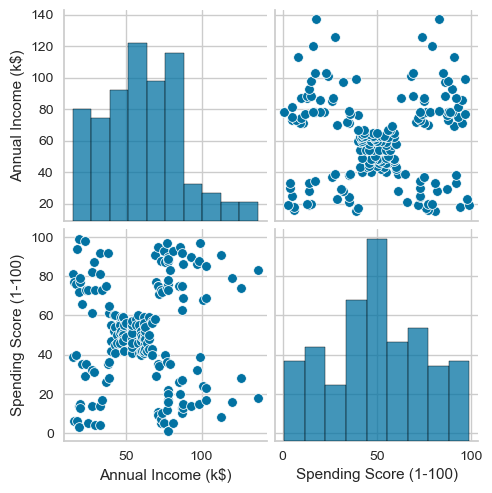

In [46]:
# Annual_Income age and spending score distributions
sns.pairplot(X_ai_s)

## inertia elbow method

In [47]:
ssd = []

K2 = range(2,10)

for k in K2:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X_ai_s)
    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

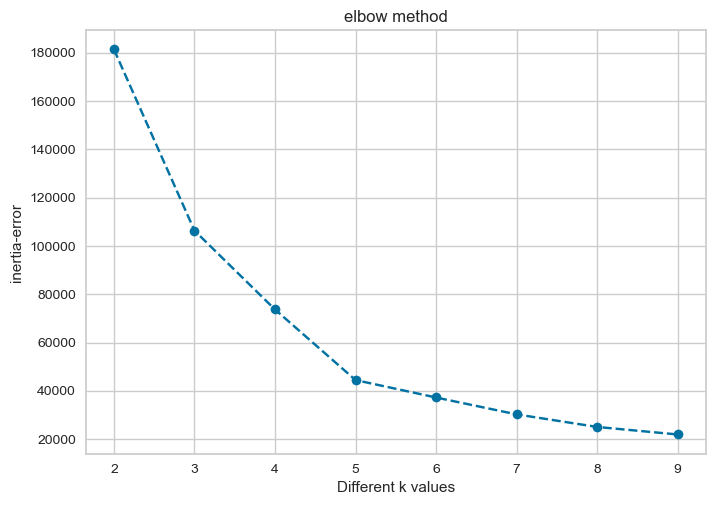

In [48]:
plt.plot(K2, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [49]:
#print our series
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6992.470893
6     5204.926014
7     3119.622814
dtype: float64

## distortion elbow method

In [50]:
K2 = range(2, 10)
distortion = []
for k in K2:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_ai_s)
    distances = kmeanModel.transform(X_ai_s) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

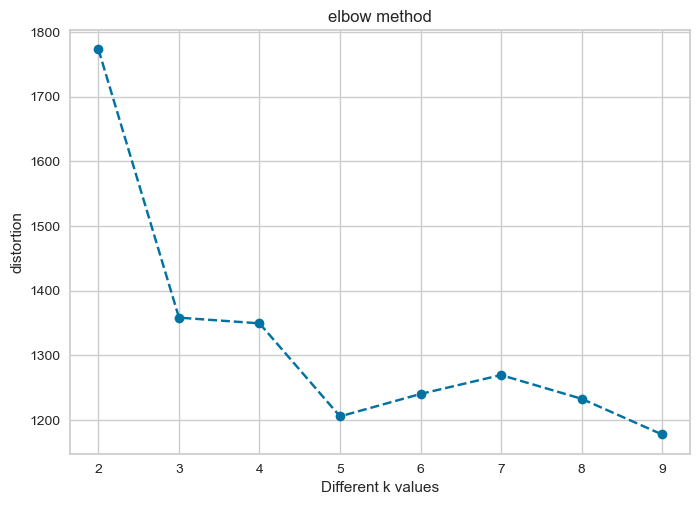

In [51]:
plt.plot(K2, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [52]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_ai_s)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_s, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367


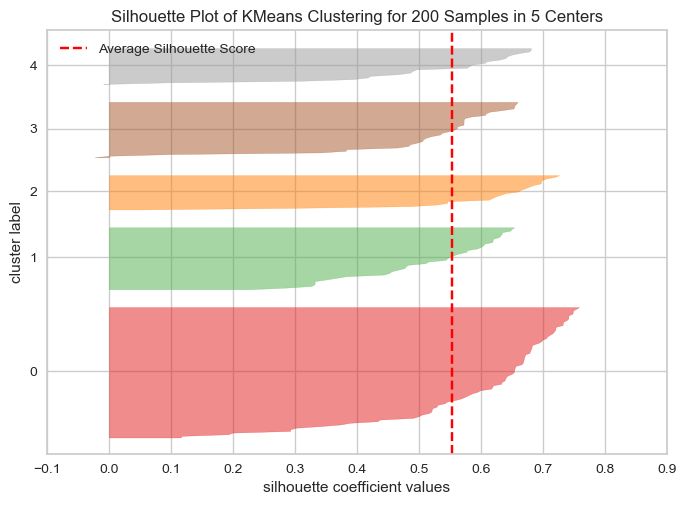

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer

model_5 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_5)

visualizer.fit(X_ai_s)    # Fit the data to the visualizer
visualizer.poof();


In [54]:
#model3.n_clusters

for i in range(model_5.n_clusters):
    label = (model_5.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5091706489322517
mean silhouette score for label 2    : 0.5990128687006722
mean silhouette score for label 3    : 0.5039873487056818
mean silhouette score for label 4    : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [55]:
K_means_model_2 = KMeans(n_clusters=5,
                       random_state=42)
K_means_model_2.fit_predict(X_ai_s)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [56]:
# here also We are making a copy as we will perform 
#a clustering operation and compare it with Hierarchical Clustering.
df_ai_s = X_ai_s.copy()
df_ai_s.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *iv. Visualizing and Labeling All the Clusters*

In [57]:
clusters_2 = K_means_model_2.labels_

In [58]:
df_ai_s.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [59]:
df_ai_s["predicted_clusters"] = clusters_2
df_ai_s.head()

,Annual Income (k$),Spending Score (1-100),predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


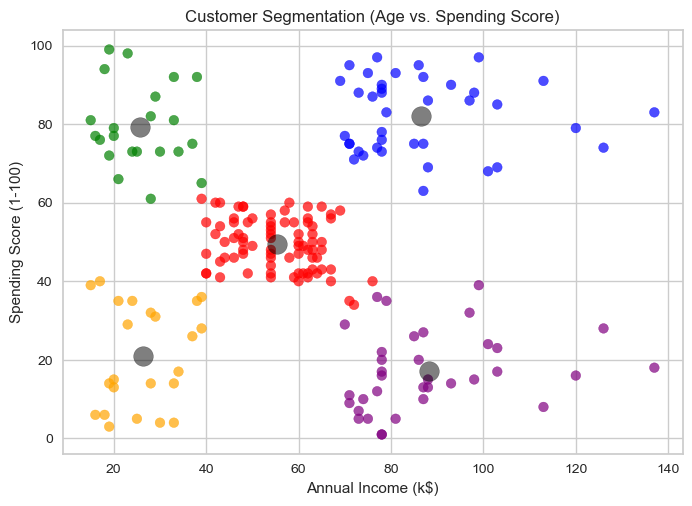

In [60]:
# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
centers = K_means_model_2.cluster_centers_
# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(df_ai_s['Annual Income (k$)'],
            df_ai_s['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in df_ai_s.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

In [61]:
labels={0:'med income med spenders', 1:'high income low spenders', 
        2:'low income low spenders', 3:'low income high spenders', 4:'high income high spenders'}

df_ai_s['Meaningful Labels']=df_ai_s['predicted_clusters'].map(labels)
df_ai_s.head()

,Annual Income (k$),Spending Score (1-100),predicted_clusters,Meaningful Labels
0,15,39,4,high income high spenders
1,15,81,2,low income low spenders
2,16,6,4,high income high spenders
3,16,77,2,low income low spenders
4,17,40,4,high income high spenders


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [62]:
X_age_s

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [66]:
#!pip install interact
from ipywidgets import interact


@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X_age_s, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

In [70]:
#silhouette score
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_age_s)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_s, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091


We have determend that we will use 3 clusters using ward method.

## Clustering based on Annual Income and Spending Score- x2

In [71]:
X_ai_s

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [72]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X_ai_s, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

## We have determend that we will use 3 clusters using ward method.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [73]:
X_age_s

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [74]:
Agg1 = AgglomerativeClustering(n_clusters=4,affinity="euclidean", linkage="ward")
y_agg = Agg1.fit_predict(X_age_s)

In [76]:
df_age_s

,Age,Spending Score (1-100),predicted_clusters,Meaningful Labels
0,19,39,3,young med spenders
1,21,81,1,diverse low spenders
2,20,6,2,young high spenders
3,23,77,1,diverse low spenders
4,31,40,3,young med spenders
...,...,...,...,...
195,35,79,1,diverse low spenders
196,45,28,2,young high spenders
197,32,74,1,diverse low spenders
198,32,18,2,young high spenders


In [77]:
df_age_s['cluster_Agg'] = y_agg
df_age_s.head()

,Age,Spending Score (1-100),predicted_clusters,Meaningful Labels,cluster_Agg
0,19,39,3,young med spenders,0
1,21,81,1,diverse low spenders,3
2,20,6,2,young high spenders,2
3,23,77,1,diverse low spenders,3
4,31,40,3,young med spenders,0


#### Annual Income and Spending Score- x2

In [78]:
X_ai_s

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [79]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') #older sklearn
y_agg2 = Agg2.fit_predict(X_ai_s)

In [80]:
df_ai_s

,Annual Income (k$),Spending Score (1-100),predicted_clusters,Meaningful Labels
0,15,39,4,high income high spenders
1,15,81,2,low income low spenders
2,16,6,4,high income high spenders
3,16,77,2,low income low spenders
4,17,40,4,high income high spenders
...,...,...,...,...
195,120,79,1,high income low spenders
196,126,28,3,low income high spenders
197,126,74,1,high income low spenders
198,137,18,3,low income high spenders


In [81]:
df_ai_s['cluster_Agg'] = y_agg2
df_ai_s.head()

,Annual Income (k$),Spending Score (1-100),predicted_clusters,Meaningful Labels,cluster_Agg
0,15,39,4,high income high spenders,4
1,15,81,2,low income low spenders,3
2,16,6,4,high income high spenders,4
3,16,77,2,low income low spenders,3
4,17,40,4,high income high spenders,4


### iii. *Visualizing and Labeling All the Clusters* 

In [82]:
df_age_s

,Age,Spending Score (1-100),predicted_clusters,Meaningful Labels,cluster_Agg
0,19,39,3,young med spenders,0
1,21,81,1,diverse low spenders,3
2,20,6,2,young high spenders,2
3,23,77,1,diverse low spenders,3
4,31,40,3,young med spenders,0
...,...,...,...,...,...
195,35,79,1,diverse low spenders,3
196,45,28,2,young high spenders,0
197,32,74,1,diverse low spenders,3
198,32,18,2,young high spenders,2


#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

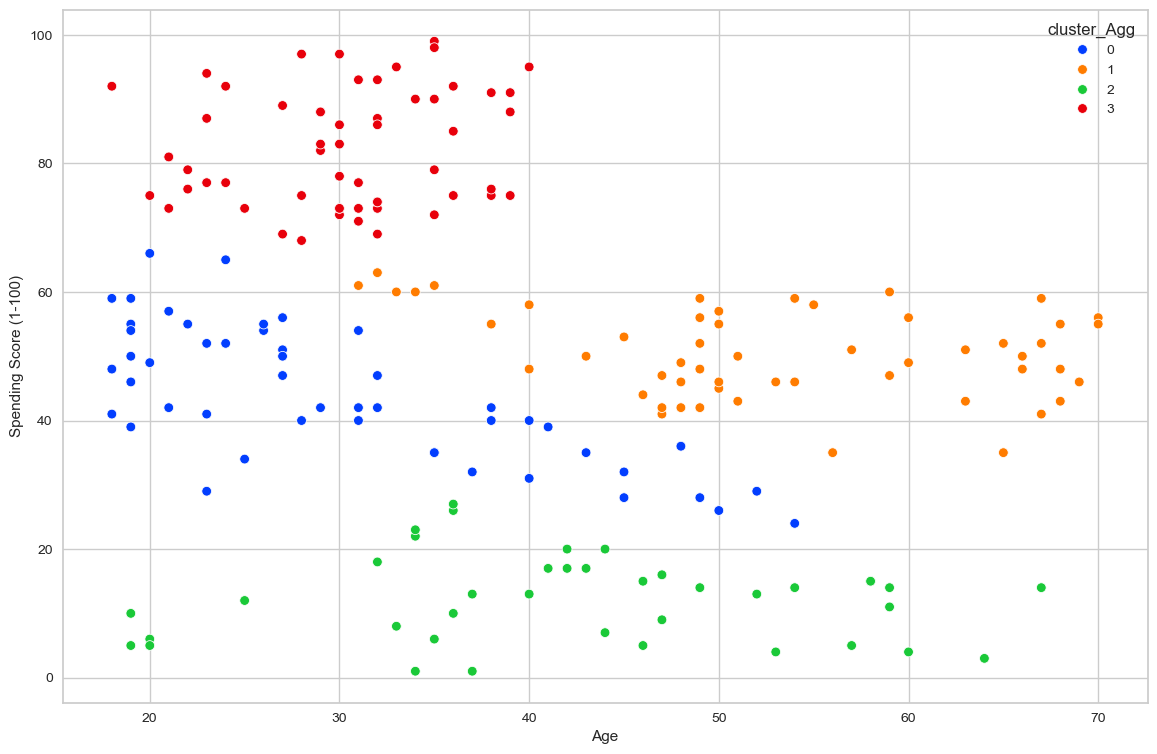

In [85]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_age_s,
                palette="bright")

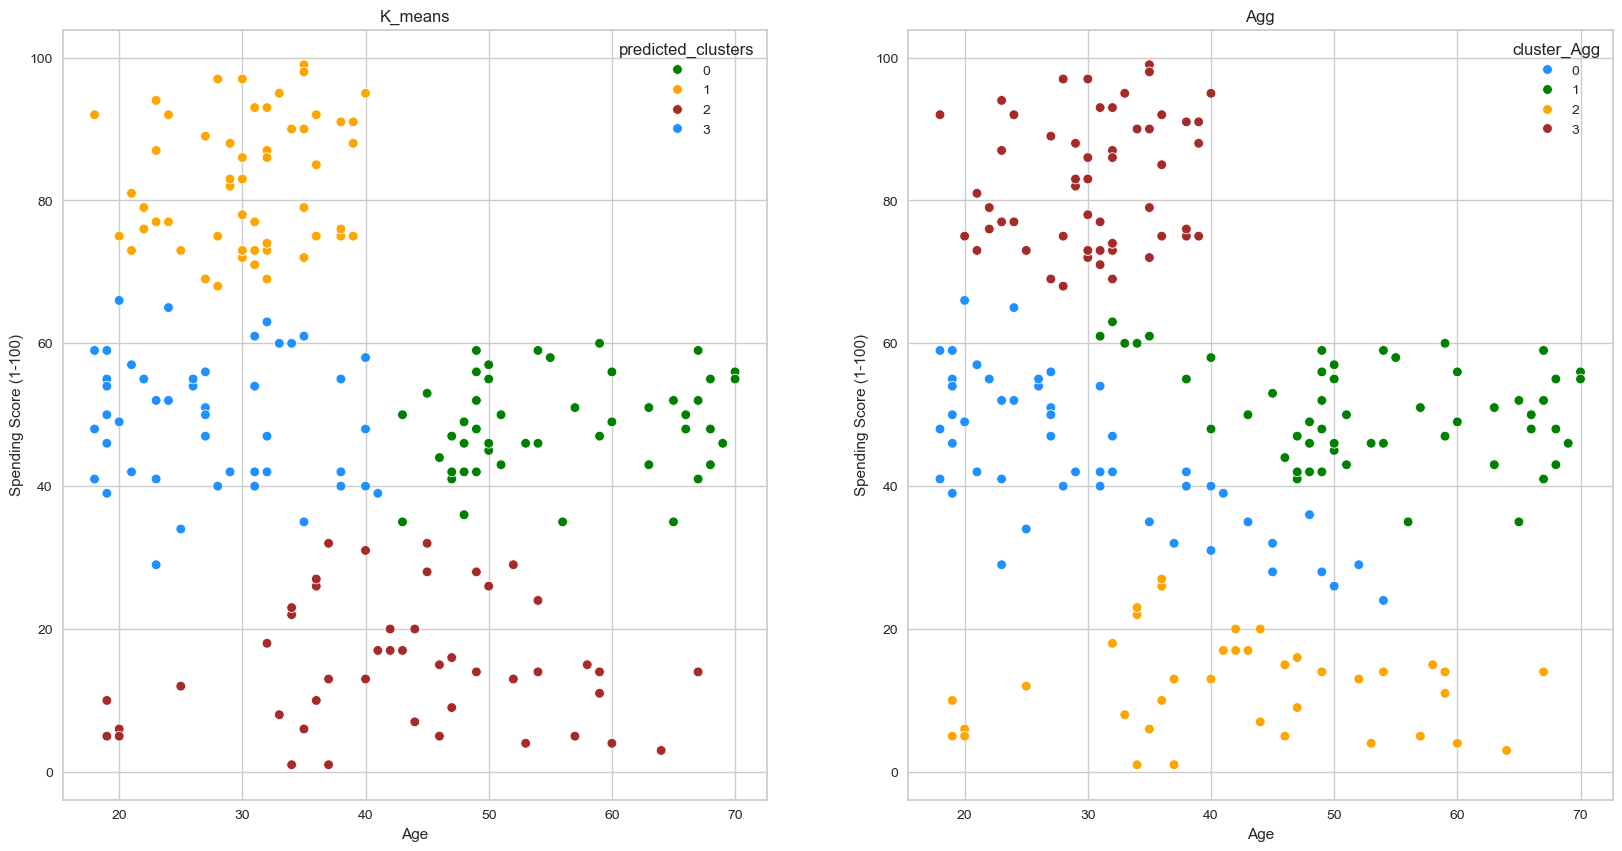

In [88]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='predicted_clusters',
                data=df_age_s,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_age_s,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

#### Annual Income and Spending Score- x2

In [89]:
df_ai_s

,Annual Income (k$),Spending Score (1-100),predicted_clusters,Meaningful Labels,cluster_Agg
0,15,39,4,high income high spenders,4
1,15,81,2,low income low spenders,3
2,16,6,4,high income high spenders,4
3,16,77,2,low income low spenders,3
4,17,40,4,high income high spenders,4
...,...,...,...,...,...
195,120,79,1,high income low spenders,2
196,126,28,3,low income high spenders,0
197,126,74,1,high income low spenders,2
198,137,18,3,low income high spenders,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

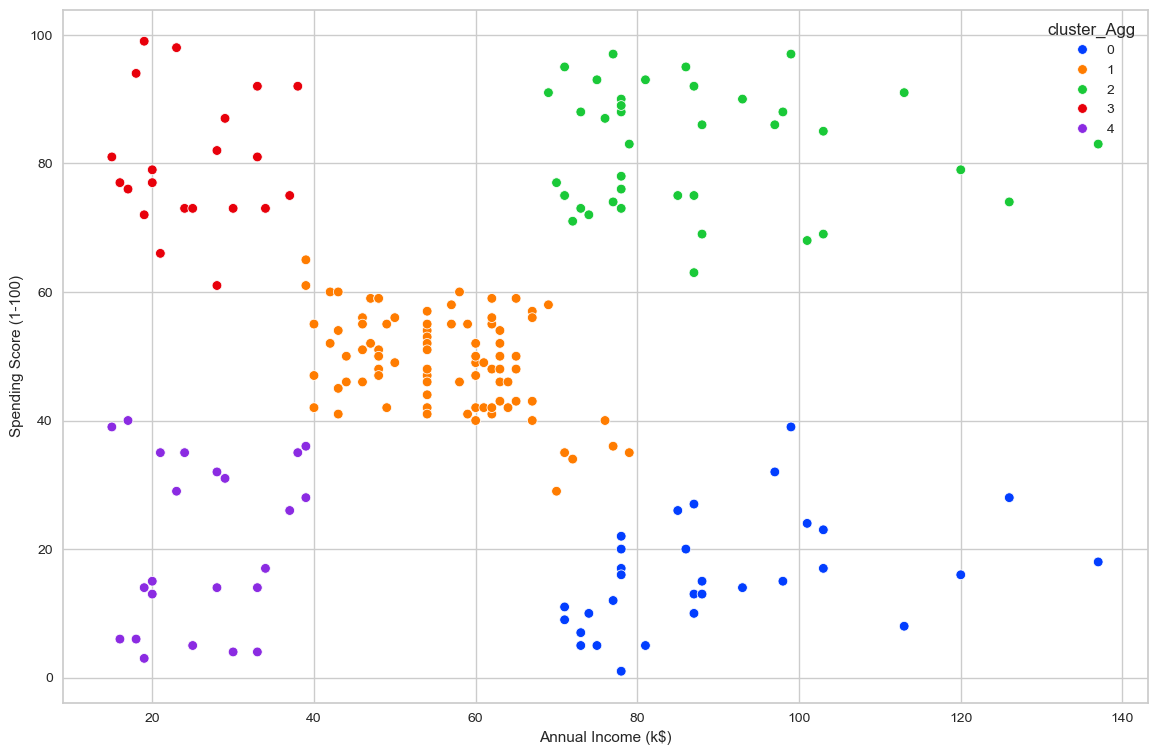

In [90]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_ai_s ,
                palette="bright")

Text(0.5, 1.0, 'Agg')

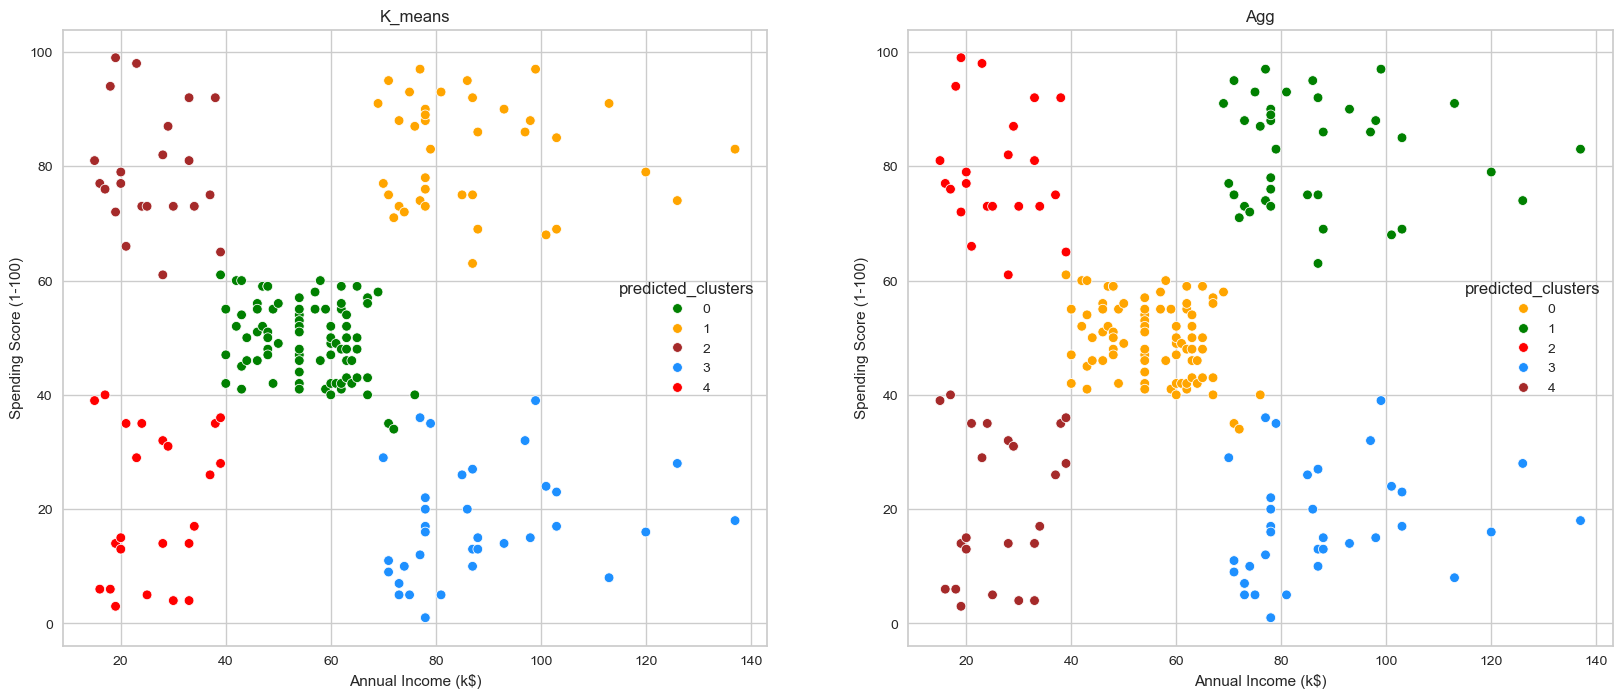

In [93]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='predicted_clusters',
                data=df_ai_s,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='predicted_clusters',
                data=df_ai_s,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

It seems, there is no relationship between Age and Spending score, as the age increases, the spending doesn't necessarily increases.

We have seen there is a big difference in spending between Male and Female, and we think, it is affecting the results, and we cannot determine any relationship between the varibales

In [94]:
df_age_s

,Age,Spending Score (1-100),predicted_clusters,Meaningful Labels,cluster_Agg
0,19,39,3,young med spenders,0
1,21,81,1,diverse low spenders,3
2,20,6,2,young high spenders,2
3,23,77,1,diverse low spenders,3
4,31,40,3,young med spenders,0
...,...,...,...,...,...
195,35,79,1,diverse low spenders,3
196,45,28,2,young high spenders,0
197,32,74,1,diverse low spenders,3
198,32,18,2,young high spenders,2


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

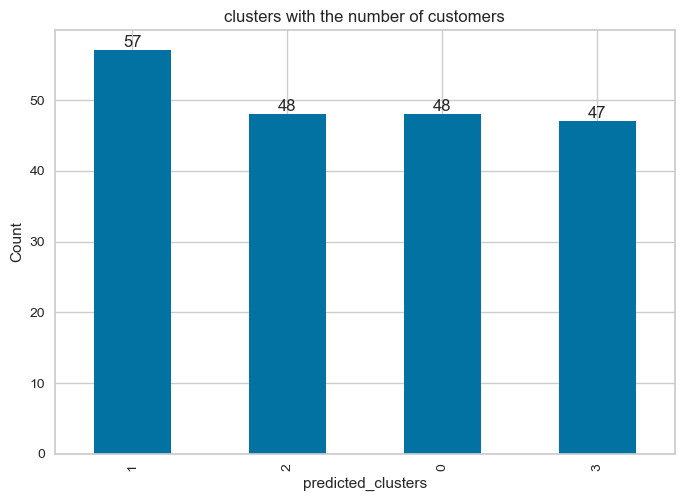

In [97]:
# we want to determine the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_s.predicted_clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [98]:
# lets add clusters resulting from Kmeans to our df (age-spending score)
df["cluster_Age_Spending_Score"] = df_age_s.predicted_clusters
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


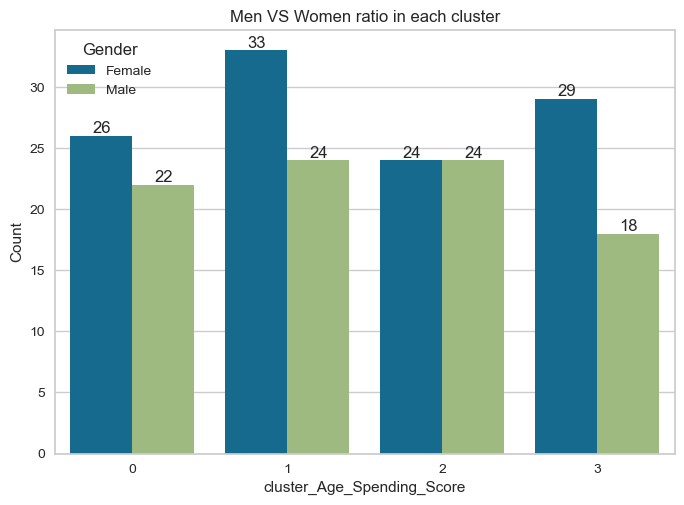

In [99]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.
# 2 and 3 clusters have an excess of women.

In [101]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.groupby("cluster_Age_Spending_Score").mean()
# We group them according to the clusters formed.

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster_Age_Spending_Score,,,,
0,0.458333,55.708333,54.770833,48.229167
1,0.421053,30.175439,66.070175,82.350877
2,0.500000,43.291667,66.937500,15.020833
3,0.382979,27.617021,53.276596,49.148936


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending Score (1-100)'>

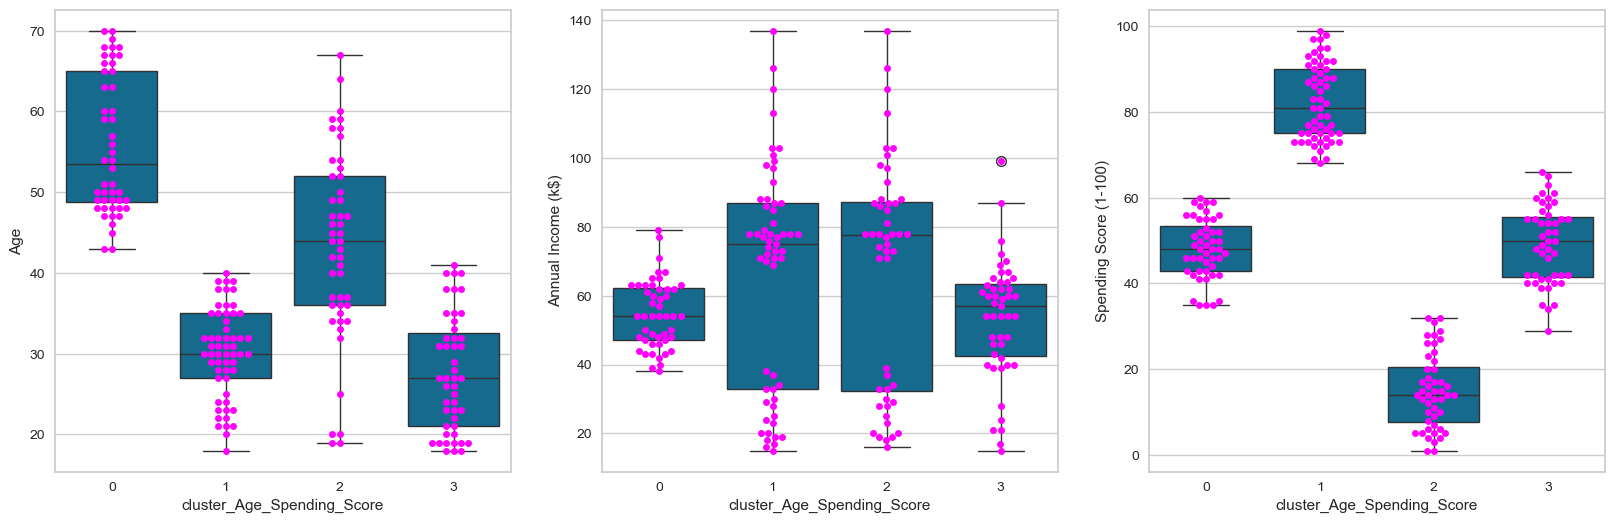

In [103]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual Income (k$)", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual Income (k$)",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending Score (1-100)", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending Score (1-100)",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

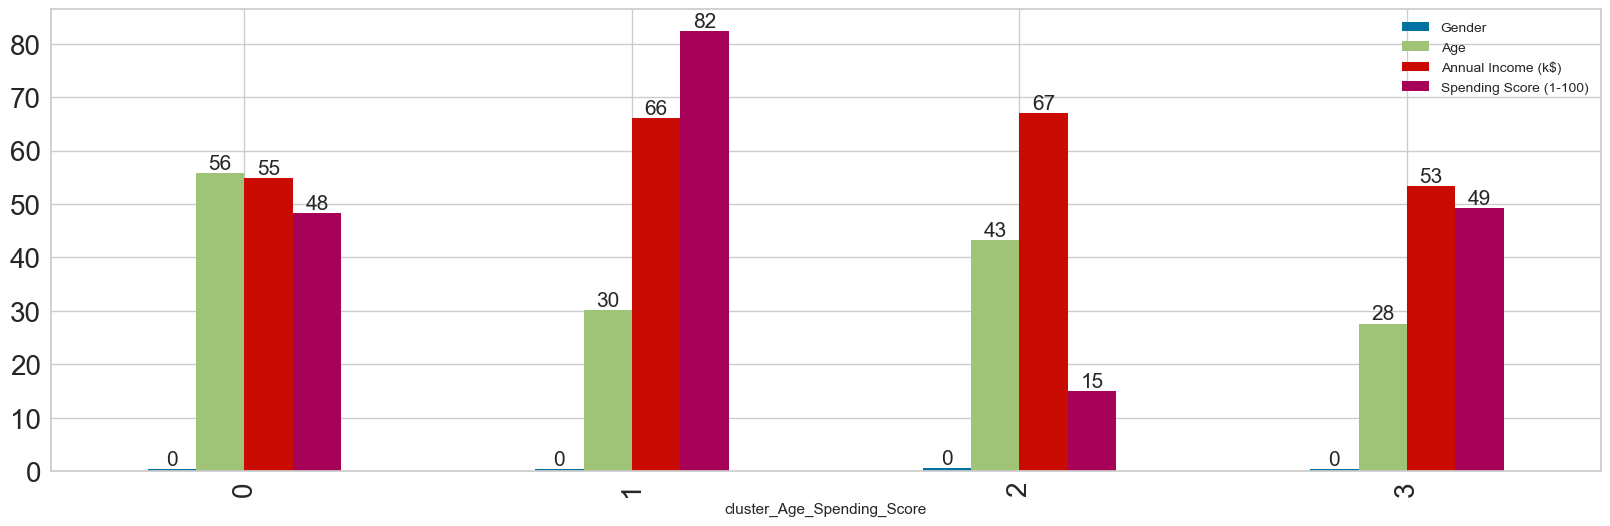

In [104]:
# using df.groupby("cluster_Age_Spending_Score").mean().
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [109]:
df_ai_s.predicted_clusters.value_counts()

predicted_clusters
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

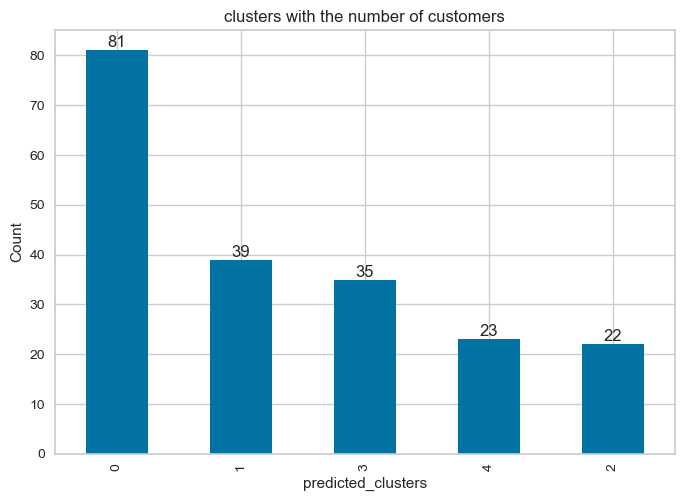

In [111]:
# again we will see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_s.predicted_clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [112]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

# we drop the cluster_Age_Spending_Score to get results according
#to the clusters we created with Kmeans.

In [114]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_s.predicted_clusters
df.head()
# Add cluster_Annual_Income_Spending_Score column.

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Annual_Income_Spending_Score
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


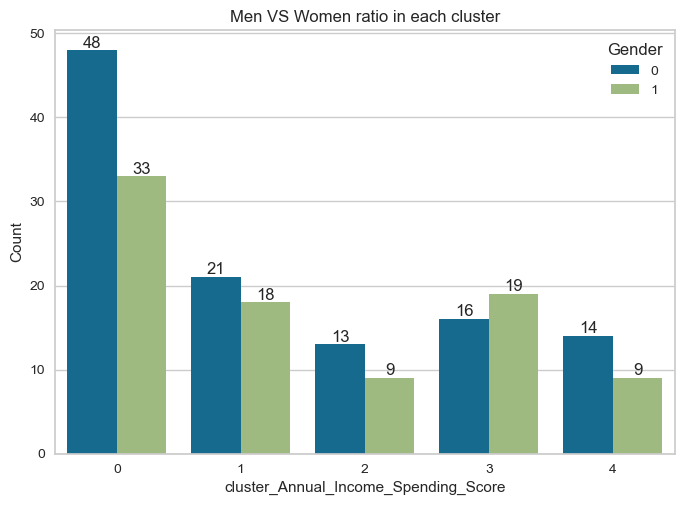

In [115]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [116]:
# grouping df by both Gender and cluster_Annual_Income_Spending_Score.
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score                                  
0      0                                     40.895833           55.354167   
       1                                     32.190476           86.047619   
       2                                     25.461538           25.692308   
       3                                     43.250000           90.937500   
       4                                     43.214286           27.357143   
1      0                                     45.363636           55.212121   
       1                                     33.277778           87.111111   
       2                                     25.000000           25.777778   
       3                                     39.315789           85.894737   
       4                                     48.333333           24.666667   

                                             Spending Score (1-100)  
Gender cluster_Annual_Income_Spending_Score                          
0      0                                                  49.000000  
       1                                                  81.666667  
       2                                                  80.538462  
       3                                                  22.062500  
       4                                                  21.714286  
1      0                                                  50.272727  
       1                                                  82.666667  
       2                                                  77.666667  
       3                                                  12.947368  
       4                                                  19.666667

<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending Score (1-100)'>

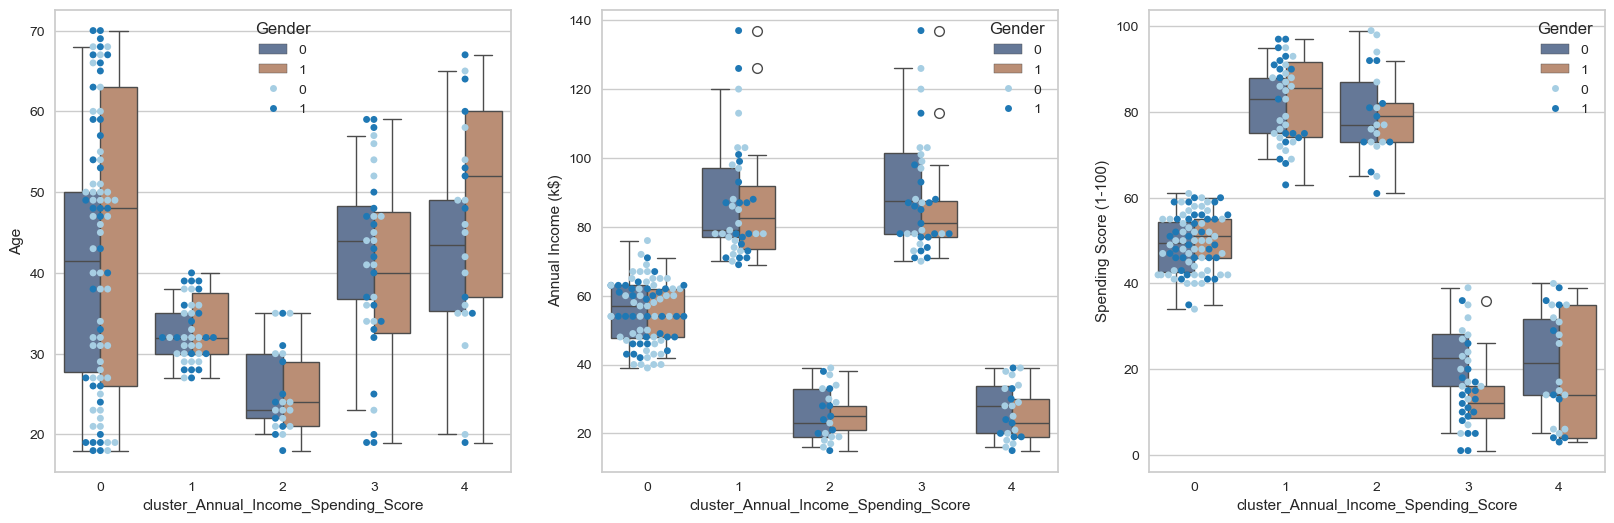

In [117]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual Income (k$)", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual Income (k$)", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending Score (1-100)", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending Score (1-100)", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

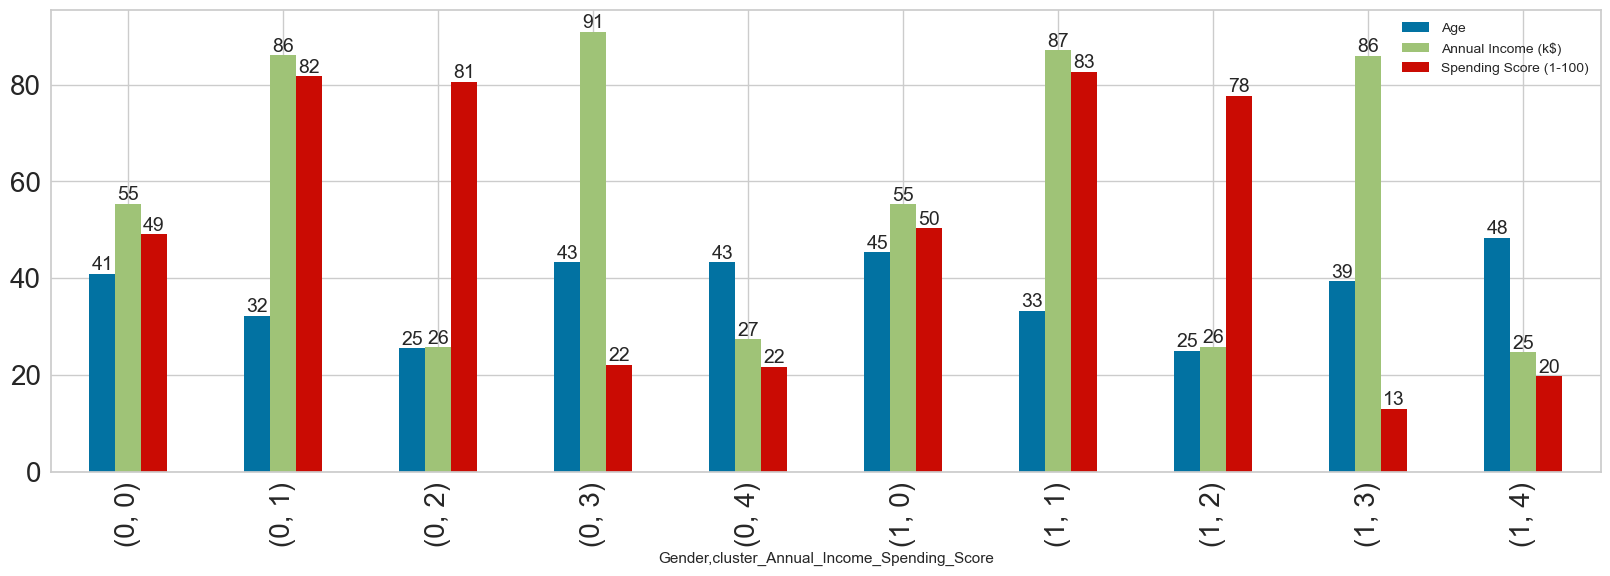

In [118]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion


### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

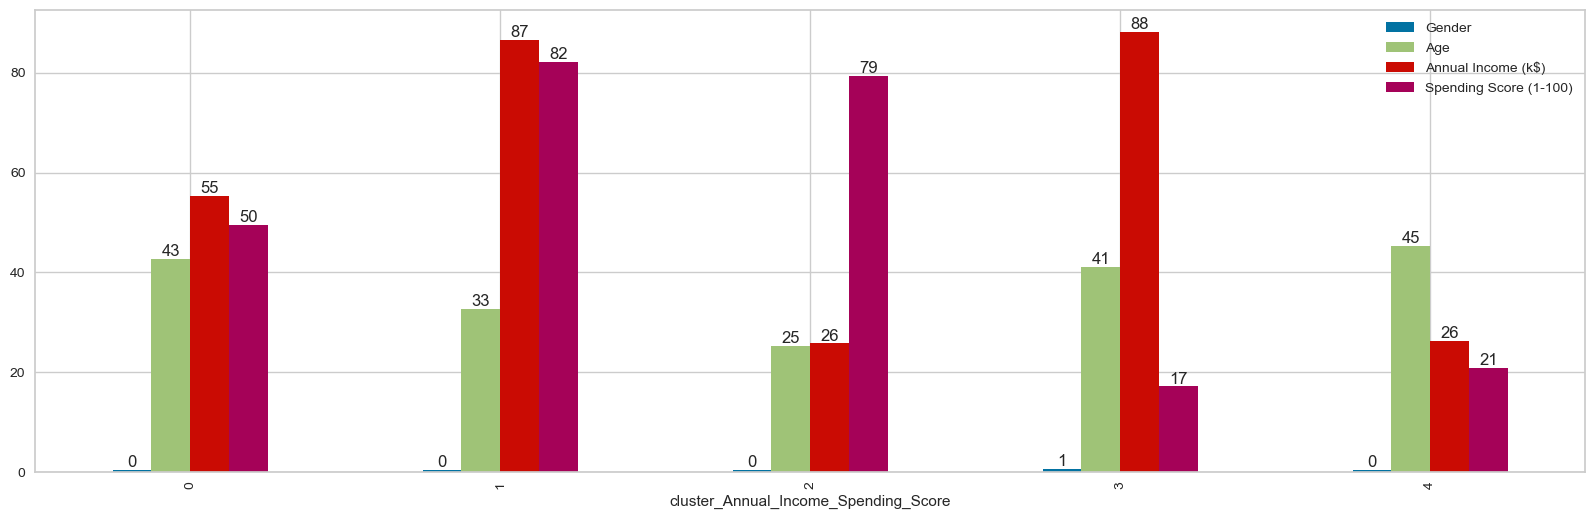

In [119]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___